# CIS 5450 Homework 1: Data Wrangling and Cleaning (Spring 2023)
_Due: February 7th, 10:00 PM EST_

Hello future data scientists and welcome to CIS 5450! In this homework, you will familiarize yourself with Pandas 🐼! The cutest animal and one of the essential libraries for Data Science. This homework is focused on one of the most important tasks in Data Science, preparing datasets so that they can be analyzed, plotted, used for machine learning models, etc...

This homework will be broken into analyzing several datasets across three sections and a fourth section focusing on XPath!

1. Working with Major League Soccer (MLS) player, table and match data.

2. Working on merged/joined versions of the datasets (more on this later though).

**IMPORTANT NOTE: Before starting, you must click on the "Copy To Drive" option in the top bar. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved** 


Run the following two cells to setup the notebook

In [2]:
!pip install -i https://test.pypi.org/simple/ penn-grader==0.5.0

Looking in indexes: https://test.pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 852.5 kB/s eta 0:00:00a 0:00:01


In [1]:
from penngrader.grader import *
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math
import re

In [2]:
!wget -nc https://storage.googleapis.com/penn-cis5450/matches.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/tables.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/players.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/goalkeepers.csv

File ‘matches.csv’ already there; not retrieving.

File ‘tables.csv’ already there; not retrieving.

File ‘players.csv’ already there; not retrieving.

File ‘goalkeepers.csv’ already there; not retrieving.



#What is Pandas?

<div class = "row">
<div class="column">
Apart from animals, Pandas is a Python library to aid with data manipulation/analysis. It is built with support from Numpy. Numpy is another Python package/library that provides efficient calculations for matrices and other math problems.
</div><div class="column">
<p class="d-flex" align = "center">
<img src = "https://thehill.com/sites/default/files/styles/article_full/public/panda_getty.jpg?itok=4ce_5sip" height= "200" align ="center"/>
<img src = "https://cff2.earth.com/uploads/2016/09/08101343/giant-panda-bear_1big_stock1.jpg" height= "200" align ="center"/>
</p>
</div>
</div>

Let's also get familiarized with the **PennGrader**. It was developed specifically for 545 by a previous TA, Leonardo Murri. 
<br>

PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [453]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. 
# IF NOT, THE AUTOGRADER WON'T KNOW WHO TO ASSIGN POINTS TO YOU IN OUR BACKEND
# YOUR PENN-ID GOES HERE AS AN INTEGER
STUDENT_ID = 51747601

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = "it_is_a_secret_for_hw2"

Leave this cell as-is...

In [4]:
%%writefile config.yaml

grader_api_url: 'https://wyv616tp17.execute-api.us-east-1.amazonaws.com/default/Grader'
grader_api_key: 'Kd32fl3g3p917iM0zwjiO23Bitj4PO9ga4LektOa'

Overwriting config.yaml


In [5]:
grader = PennGrader('config.yaml', 'CIS5450_23Sp_HW1', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 51747601

Make sure this correct or we will not be able to store your grade


Pandas (the animal) are lazy. Their days are made up of eating and sleeping. Just like mine. Let's run a cell just to make sure PennGrader works.

#### **PennGrader Check [2 points]**
- Change `favorite_activity` to whichever panda "activity" you prefer, as a string (2 points)

**Note**: We'll use cells like these "TODO" above to indicate what is important to have in each section of the notebook. Some general guidelines:

- You don't have to do all of these in one cell/step; we're just labeling them for each section which might have smaller sub-sections (for example, look at how 1.2 is set up for your reference).
- Make sure to read these carefully and do everything that is asked.
- Make sure to run all the PennGrader test cells; if we forgot anything, please let us know ASAP on Ed Discussion so that we can update the Markdown cells here.

In [8]:
# In this cell, put which panda activity you prefer in lowercase - either eating or sleeping
# Input activity name in all lowercase
favorite_activity = "eating"

In [9]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'panda_test', answer = favorite_activity)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You just had your first experience with the Penn Grader! For the future questions, once you have completed a question, you can submit your answer to the Penn Grader for immediate feedback. Awesome, right?

We will use scores from Penn Grader to determine your grade. You will still need to submit your notebook so we can check for cheating and plagarism. Do not cheat. 

**Note:** If you run Penn Grader after the due date for any question, your assignment will be marked late, even if you already had full points for the question before the deadline. To remedy this, if you're going to run your notebook after the deadline, either do not run the grading cells, or reinitialize the grader with an empty or clearly fake ID such as <code>999999999999</code> (please use 10+ digits to be clearly a fake <code>STUDENT_ID</code>)

#Adding our data so that our code can find it

We can't be data scientists without data! We provided code for you to download the data (the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to this image

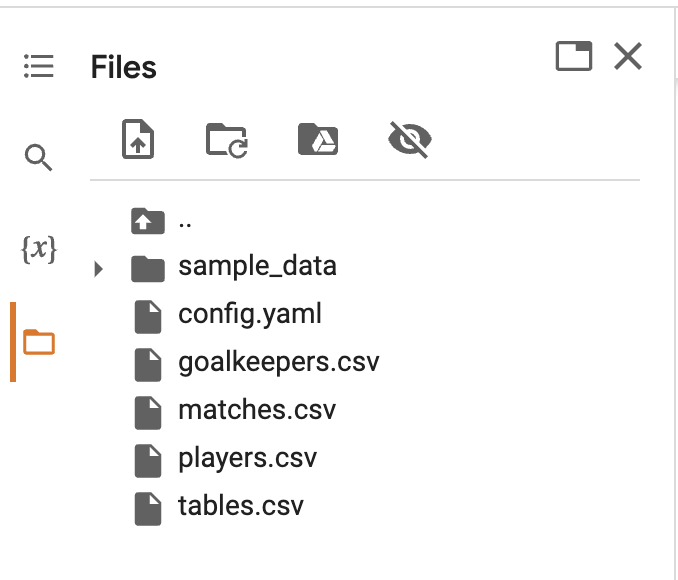

#Part 1: Working with MLS Data [45 points]

In this part of the homework we will be working with a dataset focused on MLS Matches! 

Let's first load our dataset into a Pandas Dataframe. Use Pandas's <code>read_csv</code> functionality, which you can find documentation for here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

While reading documentation is hard at first, we **strongly encourage you** to get into the habit of doing this, since many times your questions will be answered directly by the documentation (ex: "why isn't my dataframe dropping duplicates" or "why didn't this dataframe update").

#### **TODO**
- Save the Matches dataframe to a variable named: <code>matches_df</code>
- Save the Players dataframe to a variable named: <code>players_df</code>
- Save the Goalkeepers dataframe to a variable named: <code>goalkeepers_df</code>
- Save the Tables dataframe to a variable named: <code>tables_df</code>

In [13]:
#TODO: Import your four files to pandas dataframes -- make sure the dataframes are named correctly!
matches_df = pd.read_csv("matches.csv")
players_df = pd.read_csv("players.csv")
goalkeepers_df = pd.read_csv("goalkeepers.csv")
tables_df = pd.read_csv("tables.csv")

Let's focus on the `matches_df` for now and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find how to do this!)

In [134]:
#TODO: Display the first 10 rows of `matches_df`
matches_df.head(10)

,home_clubname,away_clubname,date,year,time (utc),attendance,venue,league,part_of_competition,game_status,...,away_wonCorners,home_saves,away_saves,away_bench_14_num,away_bench_14,away_bench_14_minute,home_formation,away_formation,home_club,away_club
0,New England,San Jose,31/7/96,1996,NaN,"12,871",Foxboro Stadium,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SJ
1,Dallas,Colorado,15/6/96,1996,NaN,"9,704",Cotton Bowl,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Colorado,D.C. United,29/8/96,1996,NaN,"6,368",Mile High Stadium,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC
3,LA Galaxy,New England,8/8/96,1996,NaN,"10,251",Rose Bowl,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,NaN
4,New England,D.C. United,20/7/96,1996,NaN,"18,347",Foxboro Stadium,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC
5,D.C. United,Colorado,21/9/96,1996,NaN,"20,573",Robert F. Kennedy Memorial Stadium,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,NaN
6,Tampa Bay,Columbus,22/6/96,1996,NaN,"8,767",Houlihan's Stadium,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TB,NaN
7,LA Galaxy,Dallas,25/8/96,1996,NaN,"19,279",Rose Bowl,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,NaN
8,D.C. United,Columbus,28/7/96,1996,NaN,"11,173",Robert F. Kennedy Memorial Stadium,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,NaN
9,MetroStars,KC Wiz,26/6/96,1996,NaN,"16,103",Giants Stadium,1996 MLS,Regular Season,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET,NaN


Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of `matches_df` in this cell below. 

In [135]:
# TODO: Display the datatypes in `matches_df` - feel free to refer to Pandas documentation for this
matches_df.dtypes

home_clubname           object
away_clubname           object
date                    object
year                     int64
time (utc)              object
                         ...  
away_bench_14_minute    object
home_formation          object
away_formation          object
home_club               object
away_club               object
Length: 210, dtype: object

Save the types of the `home_clubname`, `away_clubname`, `year`, `venue` and `attendance` columns to a variable called `matches_df_types` (look into Pandas documentation to find a function for this), and pass them into the autograder cell below.

In [136]:
matches_df_types = matches_df.dtypes.loc[["home_clubname","away_clubname","year","venue","attendance"]]

In [137]:
# View the output here!
matches_df_types

home_clubname    object
away_clubname    object
year              int64
venue            object
attendance       object
dtype: object

In [138]:
# TEST CASE: matches_df_types (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'matches_df_types', answer = matches_df_types)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.1 Cleaning up Matches data (5 points)

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows in `matches_df` to clean up our data. Note that there might be multiple ways to do each step. Also note that a lot of the columns in `matches_df` have all nulls. Thus, **ensure to drop the unnecessary columns before filtering out rows with nulls**


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Keep only the following columns:
 `home_clubname`, `away_clubname`, `date`, `year`, `attendance`, `venue`, `part_of_competition`, `home_score`, `away_score`.
- Drop rows that have nulls (e.g. NaN) in them.
- Cast `home_clubname`, `away_clubname` and `venue` columns to type `string`.
- Save the result to `matches_cleaned_df`.

In [198]:
#TODO: Keep only the necessary columns
matches_cleaned_df = matches_df.loc[:,["home_clubname","away_clubname","date","year","attendance","venue","part_of_competition","home_score","away_score"]]

In [199]:
#TODO: Drop nulls
matches_cleaned_df = matches_cleaned_df.dropna()

In [203]:
#TODO: Cast type
matches_cleaned_df = matches_cleaned_df.astype({"home_clubname": "string", "away_clubname": "string", "venue": "string"})

In [204]:
matches_cleaned_df.dtypes

home_clubname          string
away_clubname          string
date                   object
year                    int64
attendance             object
venue                  string
part_of_competition    object
home_score              int64
away_score              int64
dtype: object

In [205]:
# TEST CASE: matches_cleaned_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'matches_cleaned_df', answer = matches_cleaned_df.head(1000))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.2 Data Wrangling with Matches Data (20 points)

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `matches_cleaned_df` for this part.

### 1.2.0 Preprocessing for `matches_final_df` (8 points)

**TODO: 1.2.0**

*  Create a column called `is_regular_season` that takes on a value of **1** if the `part_of_competition` value for that particular row is `'Regular Season'`, otherwise it takes on a value of **0** if not.
* Create a column called `attendance_cleaned` that converts the string-based `'attendance'` column's values into a cleaned `int64` values (removing commas).
* Create a column called `date_cleaned` that converts the `date` column's values into a cleaned `datetime` values.
* Drop the redundant columns `part_of_competition`, `attendance` and `date`.
*   Save the final result into `matches_final_df` (8 points)


**Hint**: See [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html), `lambda` and [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) in Pandas documentation.

**Note**: Do not use for loops for these tasks.

In [180]:
#TODO: Create is_regular_season column
matches_cleaned_df["is_regular_season"] = np.where(matches_cleaned_df["part_of_competition"] == "Regular Season", 1, 0)

In [456]:
#TODO: Create attendance_cleaned column
matches_cleaned_df["attendance_cleaned"] = matches_cleaned_df["attendance"].apply(lambda x: x.replace(",","")).astype(int)

In [457]:
#TODO: Create date_cleaned column
matches_cleaned_df["date_cleaned"] = pd.to_datetime(matches_cleaned_df["date"])
matches_cleaned_df["date_cleaned"]

0      1996-07-31
1      1996-06-15
2      1996-08-29
3      1996-08-08
4      1996-07-20
          ...    
7284   2022-07-16
7285   2022-07-16
7286   2022-07-16
7287   2022-07-16
7288   2022-07-16
Name: date_cleaned, Length: 4873, dtype: datetime64[ns]

In [183]:
#TODO: Drop redundant columns 
matches_final_df = matches_cleaned_df.drop(["part_of_competition", "attendance", "date"], axis=1)

In [184]:
# TEST CASE: matches_final_df (8pt)
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'matches_final_df', answer = matches_final_df)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.2.1 Compute the Top 3 Months with the Most Regular Season Games (4 points)

In this section we will compute the total regular season games per month and get the top 3 months with the most games. Make sure to use `matches_final_df` in this section.


**TODO: 1.2.1**
*   Create a dataframe `month_matches` with only the columns `date_cleaned` and `is_regular_season`.
* Create a new integer column called `month` using data in the `date_cleaned` column. This may cause a warning to be displayed, which is fine.
* Get the total counts of **only regular season games** per month using `month_matches`. You can overwrite the `'is_regular_season'` column with these counts.
*   Sort `month_matches` in descending order and keep the top 3 months with the most matches.

Your final dataframe will only have two columns: `'month'` and `'is_regular_season'` (which stores the counts)



In [316]:
#TODO: Create month_matches
month_matches = matches_final_df[["date_cleaned", "is_regular_season"]]
month_matches["month"] = month_matches["date_cleaned"].apply(lambda x: x.month)
month_matches = month_matches.drop(["date_cleaned"], axis=1)
month_matches = month_matches[month_matches["is_regular_season"] == 1]
month_matches = month_matches.groupby("month").count().sort_values("is_regular_season",ascending=False)[0:3]
month_matches.reset_index(inplace=True)
month_matches

/Users/zhengyuting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,month,is_regular_season
0,7,333
1,4,332
2,9,321


In [317]:
# TEST CASE: most_matches_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'most_matches_df', answer = month_matches)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.2.2 Compute Average Attendance by Venue (4 points)

In this section we will compute the average attendance by venue. Use `matches_final_df` in this section.

**TODO: 1.2.2**

*   See the `groupby()` function. 
*   Create a dataframe `avg_attendance_df` with columns `venue` and `attendance_cleaned`, where `attendance_cleaned` is now the average attendance for a given venue.
*   Round the values of `attendance_cleaned` to 2 decimal places to create new column `attendance`, and drop the previous column `attendance_cleaned`.
*   Sort `avg_attendance_df` in descending order by `attendance` and keep the top 10 highest attendance rows.

In [326]:
#TODO: Create avg_attendance_df
avg_attendance_df = matches_final_df[["venue", "attendance_cleaned"]]
avg_attendance_df = avg_attendance_df.groupby("venue").mean().round(2).sort_values(["attendance_cleaned"],ascending=False).rename(columns={"attendance_cleaned": "attendance"})[:10]
avg_attendance_df.reset_index(inplace=True)
avg_attendance_df

,venue,attendance
0,FedExField,53267.00
1,Mercedes-Benz Stadium,52120.65
2,Rose Bowl (Neutral Site),51350.00
3,Stanford Stadium,50472.33
4,Levi's Stadium,48765.00
5,Bobby Dodd Stadium,46318.22
6,"Mercedes-Benz Stadium, Atlanta, Georgia",45319.30
7,"CenturyLink Field, Seattle",42533.42
8,Foxboro Stadium (Neutral Site),39776.50
9,Robert F. Kennedy Memorial Stadium (Neutral Site),39159.00


In [327]:
# TEST CASE: avg_attendance_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'avg_attendance_df', answer = avg_attendance_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.2.3 Compute difference in percentage of close games in Regular Season vs Non-Regular Season Games (4 points)
Now, we will compute the difference between the number of close games in regular season vs non-regular season games. We consider a game to be a close game if the difference in number of goals scored between the winning and losing team is less than 2.

**TODO: 1.2.3**

* Create a dataframe `goal_difference_df` which contains columns `is_regular_season`, `home_score` and `away_score`. 
* Using a lambda function, add the column `goal_difference` that takes the absolute difference between the score values for home and away teams.
* Create a new column `goal_difference_sub_2` that contains a 1 if the goal difference is less than 2 in a game, and 0 if not. This may cause a warning to be displayed, which is fine.
* Create two new tables `regular_season_df` and `post_season_df` for regular season and post season data respectively based on the value of `is_regular_season`. 
* Find the percent of matches with that have a goal difference of less than 2 for each df through variables called `regular_season_percentage` and `post_season_percentage` respectively. Round these percentages to 4 decimal points.

In [758]:
#TODO: Find the percentages
goal_difference_df = matches_final_df[["is_regular_season","home_score","away_score"]]
goal_difference_df["goal_difference"] = goal_difference_df.apply(lambda x: abs(x["home_score"] - x["away_score"]), axis=1)
goal_difference_df["goal_difference_sub_2"] = goal_difference_df["goal_difference"].apply(lambda x: 1 if x < 2 else 0)
# regular_season_df = goal_difference_df[goal_difference_df["is_regular_season"] == 1]
# post_season_df = goal_difference_df[goal_difference_df["is_regular_season"] == 0]
# regular_season_percentage = round(regular_season_df["goal_difference_sub_2"].sum()/regular_season_df.shape[0], 4)
# post_season_percentage = round(post_season_df["goal_difference_sub_2"].sum()/post_season_df.shape[0], 4)
goal_difference_df

/Users/zhengyuting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhengyuting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,is_regular_season,home_score,away_score,goal_difference,goal_difference_sub_2
0,1,2,0,2,0
1,1,1,1,0,1
2,1,1,2,1,1
3,1,1,0,1,1
4,1,2,0,2,0
...,...,...,...,...,...
7284,1,1,0,1,1
7285,1,3,2,1,1
7286,1,2,0,2,0
7287,1,2,0,2,0


In [353]:
print((regular_season_percentage, post_season_percentage))

(0.6351, 0.663)


In [354]:
# TEST CASE: goal_difference_percent (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'goal_difference_percent', answer = (regular_season_percentage, post_season_percentage))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.3 Cleaning up Tables Data (4 points)

We now need to clean up the Tables Data. Let's follow a similar procedure as before in order to drop nulls and unnecessary columns

<br>

#### **TODO: 1.3**

- Keep only the following columns:
 `Pos`, `Club_Name`, `GP`, `W`, `L`, `GF`, `GA`, `Pts`, `Year`, `Conference`.
- Drop rows that have nulls (e.g. NaN) in them.
- Remove non-numeric characters from `Pts` then convert the its type to int (**Hint**: Look at the [re.sub](https://docs.python.org/3/library/re.html) module).
- Save the result to `tables_cleaned_df`.

In [376]:
#TODO: Create tables_cleaned_df
tables_cleaned_df = tables_df[["Pos","Club_Name","GP","W","L","GF","GA","Pts","Year","Conference"]]
tables_cleaned_df = tables_cleaned_df.dropna()
tables_cleaned_df["Pts"] = tables_cleaned_df["Pts"].apply(lambda x: re.sub("\D*", "", x)).astype(int)
tables_cleaned_df

,Pos,Club_Name,GP,W,L,GF,GA,Pts,Year,Conference
0,2.0,D.C. United,32,15,16,62,56,46,1996,Eastern Conference
1,4.0,Columbus Crew,32,11,17,59,60,37,1996,Eastern Conference
2,5.0,New England Revolution,32,9,17,43,56,33,1996,Eastern Conference
3,5.0,Colorado Rapids,32,9,21,44,59,29,1996,Western Conference
4,8.0,Columbus Crew,32,11,17,59,60,37,1996,Overall
...,...,...,...,...,...,...,...,...,...,...
557,23.0,Minnesota United FC,7,2,4,6,11,7,2021,Overall
558,24.0,FC Dallas,7,1,3,8,11,6,2021,Overall
559,25.0,Toronto FC,7,1,4,8,12,5,2021,Overall
560,26.0,Chicago Fire FC,7,1,5,4,11,4,2021,Overall


In [373]:
# TEST CASE: tables_cleaned_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'tables_cleaned_df', answer = tables_cleaned_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.4 Decade with most 50-point club teams (4 points) 
We are interested in the decade with the highest number of teams part of the '50-point club', meaning that a team scored 50+ points in the regular season.

#### **TODO: 1.4**

- Using `tables_cleaned_df`, create a table `points_df` that contains only the year and points totals (`Pts`), and filter for 50-point seasons.
- Add a column to `points_df` called `Decade` that is the integer decade of the game. **Hint**: To make your code more readable, consider writing a helper function (defined here as `decade_helper`) to return the decade and then calling this function with your lambda function. Note that the possible decades are 1990, 2000 or 2010.
- Count all the teams with 50-point seasons by decade using a groupby with count.
- Create a df called `fifty_club_df` with the columns `Decade` and `Count`, where `Decade` is the first year of each decade. 
- Return `fifty_club_df` in order of most number of teams in the 50-point club. 


In [377]:
def decade_helper(x):
    if (x < 2000): return 1990
    elif (x < 2010): return 2000
    return 2010

In [403]:
points_df = tables_cleaned_df[["Year", "Pts"]]
points_df = points_df[points_df["Pts"] >= 50]
points_df["Decade"] = points_df["Year"].apply(decade_helper)

In [401]:
fifty_club_df = points_df.groupby("Decade").count().sort_values(["Pts"],ascending=False)
fifty_club_df.reset_index(inplace=True)
fifty_club_df = fifty_club_df.rename({"Pts": "Count"}, axis=1)
fifty_club_df

,Decade,Year,Count
0,2010,134,134
1,2000,14,14
2,1990,1,1


In [402]:
# TEST CASE: fifty_club_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'fifty_club_df', answer = fifty_club_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.5 Cleaning up Players & Goalkeepers Data (6 points)

We now need to clean up the Players Data. Let's follow a similar procedure as before in order to drop nulls and unnecessary columns.

<br>

#### **TODO: 1.5**

- Keep only the following columns from `players_df`:
 `Player`, `POS`, `GP`, `GS`, `MINS`, `Year`, `Season`, `Club_Name`, `G`, `A`.
- Keep only the following columns from `goalkeepers_df`:
 `Player`, `POS`, `GP`, `GS`, `MINS`, `Year`, `Season`, `Club_Name`.
- In `goalkeepers_df`, create columns `G` and `A`, all of whose rows have a value of 0.
- Concatenate the two tables together (see [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)). You can ignore any warnings.
- Drop rows that have nulls (e.g. NaN) in them.
- Save the result to `players_cleaned_df`.

In [405]:
#TODO: Create players_df
players_df = players_df[["Player", "POS", "GP", "GS", "MINS", "Year", "Season", "Club_Name", "G", "A"]]

In [409]:
#TODO: Create goalkeepers_df
goalkeepers_df = goalkeepers_df[["Player", "POS", "GP", "GS", "MINS", "Year", "Season", "Club_Name"]]
goalkeepers_df["G"] = 0
goalkeepers_df["A"] = 0

In [410]:
#TODO: Create players_cleaned_df
players_cleaned_df = pd.concat([players_df, goalkeepers_df]).dropna()

In [413]:
# TEST CASE: players_cleaned_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'players_cleaned_df', answer = players_cleaned_df)
players_cleaned_df

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


,Player,POS,GP,GS,MINS,Year,Season,Club_Name,G,A
1,Raul Diaz Arce,F,28,28,2351,1996,reg,DC United,23,2
2,Eduardo Hurtado,F,26,26,2323,1996,reg,LA Galaxy,21,7
4,Brian McBride,F,28,28,2307,1996,reg,Columbus Crew SC,17,3
5,Steve Rammel,F,26,20,1649,1996,reg,DC United,14,3
7,Paul Bravo,M,31,31,2654,1996,reg,San Jose Earthquakes,13,5
...,...,...,...,...,...,...,...,...,...,...
1940,Emmanuel Ochoa,GK,0,0,0,2020,reg,San Jose Earthquakes,0,0
1941,Drake Callender,GK,0,0,0,2020,reg,Inter Miami CF,0,0
1942,Elliot Panicco,GK,0,0,0,2020,reg,Nashville SC,0,0
1943,Eric Dick,GK,0,0,0,2020,reg,Sporting Kansas City,0,0


##1.6 Number of Players per Club (4 points)

We are interested in finding the number of players per club over the history of the MLS. Remember to use the `players_cleaned_df`

<br>

#### **TODO: 1.6**

- See `groupby()` function to group players by their clubs.
- Create a table `players_count_df` that contains the columns `Club_Name` and `Count`, where `Count` is the number of players per club.
- Sort `players_count_df` in descending order by `Count`, and return the top 10 rows in the resulting dataframe.

In [436]:
#TODO: Create players_count_df
players_count_df = players_cleaned_df[["Club_Name","Player"]].groupby("Club_Name").count()
players_count_df.reset_index(inplace=True)
players_count_df = players_count_df.rename(columns={"Player":"Count"}).sort_values(["Count"], ascending=False)[:10]

In [437]:
# TEST CASE: players_count_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'players_count_df', answer = players_count_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Part 2: Combining the data [38 points]

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join

##2.1 Metrics on Soccer Venues



#### 2.1.1 Venues that begin with the Letter S (4 points)

We are interested in the attendance metrics of venues that begin with the letter 'S'.

<br>

##### TODO: 2.1.1

- Using `matches_cleaned_df`, create an new dataframe `s_intermediate_df` that only contains venues that begin with the capital letter `S` (no need to check for `s`).
- Add a column to `s_intermediate_df` called `count` that is a 1 if the attendance of the match at the venue is >= 10000.
- Return a dataframe called `s_venues_df` counting the number of matches whose attendance is greater than 10000 in each venue. There should be two columns: `venue` and `count`. Return this df in sorted order by count in descending order and then venue in ascending order.  

In [458]:
# matches_cleaned_df.dtypes
matches_cleaned_df["attendance_cleaned"]

0       12871
1        9704
2        6368
3       10251
4       18347
        ...  
7284    13601
7285    12274
7286    19718
7287    17975
7288    16833
Name: attendance_cleaned, Length: 4873, dtype: int64

In [467]:
# Create a dataframe that contains only venues that begin with S
# matches_cleaned_df["attendance_cleaned"]
s_intermediate_df = matches_cleaned_df[matches_cleaned_df["venue"].apply(lambda x: x.startswith("S"))]
s_intermediate_df = s_intermediate_df[s_intermediate_df["attendance_cleaned"] >= 10000]
# Create a dataframe that contains the number of matches for each venue with has with attendance more than 10000
s_venues_df = s_intermediate_df[["venue","attendance"]].groupby("venue").count().sort_values(["attendance"],ascending=False).rename({"attendance":"count"},axis=1)
s_venues_df.reset_index(inplace=True)

In [468]:
s_venues_df

,venue,count
0,SeatGeek Stadium,166
1,"Subaru Park, Philadelphia",137
2,Stade Saputo,124
3,Soldier Field,31
4,StubHub Center,31
5,"Subaru Park, Chester",23
6,"Soldier Field, Chicago",17
7,Stade Olympique,17
8,"Stade Saputo, Montreal",10
9,Stanford Stadium,6


In [469]:
# TEST CASE: s_venues (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 's_venues', answer = s_venues_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 Total Goals Scored by Away Teams who have played in the Rose Bowl (5 points)

We shall now aim to find the total goals scored by teams who have played Away in the Rose Bowl. Note that we will use `GF` as goals for or the goals scored by the club

TODO: 
- Using `tables_cleaned_df`, create a df called `table_intermediate_df` that contains the total goals scored by a club.
- After filtering `matches_cleaned_df` for the `Rose Bowl` venue, merge it on `away_clubname` with the above table to get the required clubs
- After grouping by `Club_Name`, assign it to a table called `rose_df` with columns `Club_Name` and `GF`. Sort it in descending order by `GF`. Don't forget to reset the index!



In [533]:
# Create a datframe that contains the total goals scored by the club
table_intermediate_df = tables_cleaned_df[["Club_Name", "GF"]].groupby("Club_Name").sum()
table_intermediate_df.reset_index(inplace=True)

# Filter matches_cleaned_df for the matches played in the Rose Bowl and create rose_df
rose_df = matches_cleaned_df[matches_cleaned_df.apply(lambda x: x["venue"] == "Rose Bowl", axis=1)][["away_clubname"]].drop_duplicates()
rose_df = table_intermediate_df.merge(rose_df, left_on="Club_Name", right_on="away_clubname").drop(["away_clubname"], axis=1)

In [534]:
rose_df

,Club_Name,GF
0,D.C. United,1552
1,MetroStars,302


In [535]:
# TEST CASE: rose_bowl_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'rose_bowl_df', answer = rose_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.3 High Scoring Venues (6 points)

As a final metric, we now wish to find a list of venues whose home teams had the most points that year.

TODO: 
- Create a dataframe called `tables_high_df` that contains the clubs who had the highest points in a year. Remember to filter the dataframe to only have the `Overall` conference value!
- Compute the associated `home_clubname` for each `venue` as `grouped_matches`. If a venue has multiple teams for its home team, you should use the team that plays most frequently at the venue as the `home_clubname`
- Using `grouped_matches`, compute all venues that a given `home_clubname` plays in, joining them together with `,` as a delimiter. Assign this value to `venue_matches_df`. Hint: take a look at the  [.agg()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) function to help with this!
- Merge the `tables_high_df` and `venue_matches_df` to find the venues for the top teams, returning this list as `high_venues`

In [721]:
# Create a dataframe that has the clubs with the highest points in the year
tables_high_df = tables_cleaned_df[["Club_Name","Pts","Year"]][tables_cleaned_df["Conference"] == "Overall"]
tables_high_df = tables_high_df.groupby("Year").apply(lambda x: x[x["Pts"]==x["Pts"].max()])
tables_high_df.reset_index(inplace=True, drop=True)
tables_high_df

,Club_Name,Pts,Year
0,Columbus Crew,37,1996
1,Columbus Crew,39,1997
2,New England Revolution,45,2000
3,San Jose Earthquakes,45,2002
4,Columbus Crew,49,2004
5,MetroStars,47,2005
6,New England Revolution,48,2006
7,Houston Dynamo,52,2007
8,Chivas USA,43,2008
9,New England Revolution,43,2008


In [727]:
grouped_matches_df = matches_cleaned_df[["home_clubname","venue"]].groupby("venue").apply(lambda x: x.mode()[:1])
grouped_matches_df.reset_index(inplace=True, drop=True)
print(grouped_matches_df)
venue_matches_df = grouped_matches_df.groupby("home_clubname").agg(lambda x: ", ".join(x))
venue_matches_df.reset_index(inplace=True)
venue_matches_df

           home_clubname                       venue
0    Minnesota United FC               Allianz Field
1    Minnesota United FC    Allianz Field, Minnesota
2             KC Wizards           Arrowhead Stadium
3              DC United                  Audi Field
4              DC United   Audi Field, Washington DC
..                   ...                         ...
97             FC Dallas                Toyota Field
98             FC Dallas              Toyota Stadium
99             FC Dallas  Toyota Stadium, Frisco, TX
100     New York City FC              Yankee Stadium
101     New York City FC    Yankee Stadium, New York

[102 rows x 2 columns]


,home_clubname,venue
0,Atlanta United FC,"Bobby Dodd Stadium, Mercedes-Benz Stadium, Mer..."
1,Austin FC,"Q2 Stadium, Austin"
2,CF Montréal,"Stade Olympique , Montreal, Stade Saputo, Mont..."
3,Charlotte FC,"Bank of America Stadium, Charlotte"
4,Chicago,"Rose Bowl (Neutral Site), Soldier Field"
5,Chicago Fire FC,"SeatGeek Stadium, SeatGeek Stadium, Bridgeview..."
6,Chivas USA,StubHub Center
7,Colorado,Mile High Stadium
8,Colorado Rapids,"Dick's Sporting Goods Park, Commerce City, CO,..."
9,Columbus,"MAPFRE Stadium, Ohio Stadium"


In [728]:
# TEST CASE: tables_high (3 pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'tables_high', answer = (tables_high_df,venue_matches_df) )

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [731]:
# Create a list of venues for the top teams
high_venues = venue_matches_df.merge(tables_high_df, left_on="home_clubname", right_on="Club_Name")["venue"].to_list()
high_venues

['StubHub Center',
 "Dick's Sporting Goods Park, Commerce City, CO, Dick's Sporting Goods Park, Denver",
 'Historic Crew Stadium, Columbus, OH, Lower.com Field, Columbus, OH',
 'Historic Crew Stadium, Columbus, OH, Lower.com Field, Columbus, OH',
 'Historic Crew Stadium, Columbus, OH, Lower.com Field, Columbus, OH',
 'Pizza Hut Park, Toyota Field, Toyota Stadium, Toyota Stadium, Frisco, TX',
 'BBVA Stadium, Robertson Stadium, Houston',
 'BBVA Stadium, Robertson Stadium, Houston',
 'Dignity Health Sports Park, Carson, Dignity Health Sports Park, Los Angeles, Foxboro Stadium (Neutral Site), Rose Bowl',
 'Giants Stadium',
 'Gillette Stadium, Gillette Stadium, Foxborough',
 'Gillette Stadium, Gillette Stadium, Foxborough',
 'Gillette Stadium, Gillette Stadium, Foxborough',
 'Citi Field Stadium, Citi Field Stadium, New York, Pratt & Whitney Stadium at Rentschler Field, Yankee Stadium, Yankee Stadium, New York',
 'Citi Field Stadium, Citi Field Stadium, New York, Pratt & Whitney Stadium at R

In [732]:
# TEST CASE: high_venues (3 pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'high_venues', answer = high_venues)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 2.2 Finding the Worst Performing Teams in March

We now want to see which teams tend to perform the worst in March relative to other months. In this case, we define worse performances as the count of losses in a given time frame.

#### 2.2.1 Sorted Loss Counts (6 points)

TODO:
- Create a new dataframe `march_matches` that filters `matches_cleaned_df` to only contain games from March and removes all draws
- Create a column `losing_team` within this dataframe to represent the team that lost in the particular match
- Create a dataframe called `club_losses` that contains the columns `losing_team` and `loss_count`, where `loss_count` is the total number of losses in March for a particular club.
- Sort this dataframe in descending order of `loss_count` and then in ascending order of `losing_team`


In [828]:
# Create a dataframe that filters to only matches from March and removes all draws
march_matches_df = matches_cleaned_df[matches_cleaned_df["date_cleaned"].apply(lambda x: x.month == 3)]
march_matches_df = march_matches_df[march_matches_df.apply(lambda x: x["home_score"] != x["away_score"], axis=1)]
march_matches_df["losing_team"] = march_matches_df.apply(lambda x: x["home_clubname"] if x["home_score"]<x["away_score"] else x["away_clubname"], axis=1)

In [836]:
# Create a dataframe with the count of losses of teams in March
club_losses_df = march_matches_df[["losing_team","home_clubname"]].groupby("losing_team").count().rename({"home_clubname": "loss_count"},axis=1).sort_values(["loss_count","losing_team"],ascending=[False, True])
club_losses_df = club_losses_df.reset_index()

In [837]:
club_losses_df

,losing_team,loss_count
0,San Jose Earthquakes,19
1,Toronto FC,17
2,New England Revolution,16
3,Philadelphia Union,16
4,New York Red Bulls,15
5,DC United,14
6,Portland Timbers,14
7,Real Salt Lake,14
8,Chicago Fire FC,12
9,Sporting Kansas City,12


In [838]:
# TEST CASE: club_losses (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'club_losses', answer = (club_losses_df,march_matches_df))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Judging Relative Worse Performance  (6 points)

We now want to find the teams that have performed worst in March relative to other months. In other words, we want to calculate the teams with the greatest percentage of losses in March.  


- Create a dataframe called `tables_loss_df` that contains the clubs with their total losses. Remember to filter the dataframe by the correct Conference value!
- Using `club_losses_df`, merge the dataframes and create a new column `percentage` representing the percentage of all losses of a club that have been in March
- Store the top 5 clubs with the highest percentage of such losses as a list `worst_teams`

In [852]:
# Create a filtered dataframe that contains the clubs with their total losses
tables_loss_df = tables_cleaned_df[tables_cleaned_df["Conference"] == "Overall"][["Club_Name","L"]].groupby("Club_Name").sum().reset_index()

In [853]:
tables_loss_df

,Club_Name,L
0,Atlanta United FC,10
1,Austin FC,4
2,CF Montreal,120
3,Chicago Fire FC,15
4,Chivas USA,142
5,Colorado Rapids,272
6,Columbus Crew,205
7,Columbus Crew SC,30
8,D.C. United,199
9,FC Cincinnati,41


In [867]:
# Create a list of top 5 clubs with the highest loss percentages
worst_teams_final = tables_loss_df.merge(club_losses_df, left_on="Club_Name", right_on="losing_team")
worst_teams_final["percentage"] = worst_teams_final["loss_count"] / worst_teams_final["L"]
worst_teams_final = worst_teams_final.sort_values(["percentage"], ascending=False)[:5].Club_Name.to_list()

In [868]:
worst_teams_final

['Houston Dynamo FC',
 'Chicago Fire FC',
 'Atlanta United FC',
 'Columbus Crew SC',
 'MetroStars']

In [869]:
# TEST CASE: worst_teams (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'worst_teams', answer = (worst_teams_final,tables_loss_df))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##2.3 Computing Superlative Player Metrics

Finally, we would like to understand our players further, including the players that played more than the average time and those that improved the most across years. This would help us understand our dataset in far greater depth!

#### 2.3.1 Players Always on the Pitch (5 points)

We first want to understand which players have spent more time on the pitch than average for their position.

- Create a list of unique positions in `players_cleaned_df`. Hint: the unique() function might be useful here
- For each position, compute the average minutes and all players that played at least the average amount of minutes, (they can appear more than once since we have different entries for every year)
- Finally, concatenate the dataframes as `time_player_df`, sorting it in descending order of minutes played `MINS` and then ascending order of `Player`

In [870]:
players_cleaned_df

,Player,POS,GP,GS,MINS,Year,Season,Club_Name,G,A
1,Raul Diaz Arce,F,28,28,2351,1996,reg,DC United,23,2
2,Eduardo Hurtado,F,26,26,2323,1996,reg,LA Galaxy,21,7
4,Brian McBride,F,28,28,2307,1996,reg,Columbus Crew SC,17,3
5,Steve Rammel,F,26,20,1649,1996,reg,DC United,14,3
7,Paul Bravo,M,31,31,2654,1996,reg,San Jose Earthquakes,13,5
...,...,...,...,...,...,...,...,...,...,...
1940,Emmanuel Ochoa,GK,0,0,0,2020,reg,San Jose Earthquakes,0,0
1941,Drake Callender,GK,0,0,0,2020,reg,Inter Miami CF,0,0
1942,Elliot Panicco,GK,0,0,0,2020,reg,Nashville SC,0,0
1943,Eric Dick,GK,0,0,0,2020,reg,Sporting Kansas City,0,0


In [875]:
# Create a list of unique positions
positions = players_cleaned_df.POS.unique()

In [928]:
# Compute the players who played more than the average minutes and concatenate them into one dataframe
time_player_df = players_cleaned_df[["Player","POS","MINS"]].groupby("POS").mean().rename({"MINS":"mean_MINS"}, axis=1).reset_index()
time_player_df = time_player_df.merge(players_cleaned_df, on="POS")
time_player_df = time_player_df[time_player_df.MINS >= time_player_df.mean_MINS].sort_values(["MINS","Player"], ascending=[False, True])

In [929]:
time_player_df

,POS,mean_MINS,Player,GP,GS,MINS,Year,Season,Club_Name,G,A
2497,D,1222.191515,Alexander Callens,34,34,3060,2017,reg,New York City FC,2,0
1768,D,1222.191515,Austin Berry,34,34,3060,2013,reg,Chicago Fire FC,1,2
2719,D,1222.191515,Auston Trusty,34,34,3060,2018,reg,Colorado Rapids,1,1
6688,GK,872.685000,Brad Guzan,34,34,3060,2019,reg,Atlanta United FC,0,0
6689,GK,872.685000,Daniel Vega,34,34,3060,2019,reg,San Jose Earthquakes,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6320,GK,872.685000,Joe Cannon,10,10,900,2013,reg,Vancouver Whitecaps,0,0
6000,GK,872.685000,Noah Palmer,10,10,900,2006,reg,Columbus Crew SC,0,0
5643,F-M,824.378378,Jeisson Vargas,19,10,871,2018,reg,CF Montreal,4,0
5602,F-M,824.378378,Ely Allen,12,11,848,2008,reg,LA Galaxy,1,1


In [930]:
# TEST CASE: time_players (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'time_players', answer = time_player_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.3.2 Most Improved Players (6 points)
We are now interested in which players have improved the most from 2000 to 2001, an important metric in any consideration. We shall measure this improvement in terms of change in goals scored

TODO:
- Create dataframes `df_2000` and `df_2001` for player statistics on each year
- Merge the dataframes as `together_df` and compute a difference column based on column `G`, sorting the dataframe on this
- Compute the top forward, top midfielder and top defender (defined as the player with the most improvement in goals scored) by filtering `years_df` and return only the names of the players as one list `best_players` 

In [1011]:
# Create player statistics dataframes
df_2000 = players_cleaned_df[players_cleaned_df.Year == 2000][["Player","POS","G"]]
df_2001 = players_cleaned_df[players_cleaned_df.Year == 2001][["Player","G"]]

In [1039]:
# Merge to form combined dataframe
together_df = df_2000.merge(df_2001, on="Player")
together_df["difference"] = together_df["G_y"] - together_df["G_x"]
together_df = together_df.sort_values(["difference"], ascending=False)
max_score = together_df.groupby("POS").agg({"difference":max}).reset_index()
max_score = together_df.merge(max_score, on="POS")
max_score = max_score[max_score["difference_y"] == max_score["difference_x"]]#.Player.to_list()
top_f = max_score[max_score["POS"] == "F"].Player.to_list()
top_mf = max_score[max_score["POS"] == "M"].Player.to_list()
top_d = max_score[max_score["POS"] == "D"].Player.to_list()

In [1040]:
max_score

,Player,POS,G_x,G_y,difference_x,difference_y
0,Eric Wynalda,F,1,10,9,9
27,John Wilmar Perez,M,3,8,5,5
86,Ezra Hendrickson,D,1,5,4,4
140,Jorge Rodriguez,M-D,4,6,2,2
144,Zach Thornton,GK,0,0,0,0
145,Jeff Causey,GK,0,0,0,0
146,Nick Rimando,GK,0,0,0,0
147,Tom Presthus,GK,0,0,0,0
148,David Kramer,GK,0,0,0,0
149,Adin Brown,GK,0,0,0,0


In [1041]:
print(top_f, top_mf, top_d)

['Eric Wynalda'] ['John Wilmar Perez'] ['Ezra Hendrickson']


In [1042]:
# Create list of best player names
best_players = top_f + top_mf + top_d

In [1043]:
best_players

['Eric Wynalda', 'John Wilmar Perez', 'Ezra Hendrickson']

In [1044]:
# TEST CASE: best_players (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'best_players', answer = (together_df, best_players))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Part 3: Correlation Matrix [6 points]



## 3.1 Correlation Matrix (4 + 2 points)

Occasionally, there are unexpected correlations in the data. One way to find these correlations is to use a correlation matrix. We suspect that there might be a correlation between games played (`GP`), goals scored (`G`), and assists made (`A`). But how strong is the correlation? Also, could there be any correlation between two seemingly uncorrelated features? **If there is a correlation, how strong is it?**

In this section, we will create the correlation matrix for `players_cleaned_df`.


#### **TODO: 3.1**

- Create a dataframe called `subset_players` that only contains the following columns from `players_cleaned_df`: `Year`, `GP`, `G`, `A`.

- Generate the correlation matrix.  *Hint*: Read about Pandas "corr()" function.

- Name your final answer correlation matrix dataframe to: `correlation_matrix` (4 points)

- Plot a correlation matrix -- just to get a sense of what it might look like!

In [1046]:
#TODO: Create correlation matrix
subset_players = players_cleaned_df[["Year", "GP", "G", "A"]]
correlation_matrix = subset_players.corr()

In [1047]:
correlation_matrix

,Year,GP,G,A
Year,1.000000,-0.048239,-0.041278,-0.101238
GP,-0.048239,1.000000,0.465885,0.538101
G,-0.041278,0.465885,1.000000,0.555379
A,-0.101238,0.538101,0.555379,1.000000


In [1048]:
# TEST CASE: correlation_matrix (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'correlation_matrix', answer = correlation_matrix)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix!

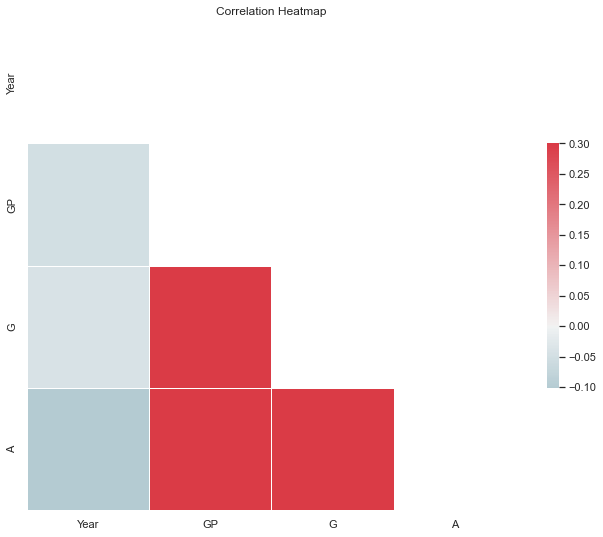

In [1050]:
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

# Part 4: XPath [9 points]


So far, we've looked at data on MLS matches. Let's change our scope to look at captains from the most recent competition! The datasets we provide are compiled for us on Kaggle, but sometimes we need to create our own datasets! We'll do some web scraping and work web-based data!

On [wikipedia.org](https://en.wikipedia.org/wiki/2022_Major_League_Soccer_season), we have a table with MLS stadium data. 

We get the DOM tree for you below.

In [1051]:
# Request the data and build the DOM tree (we've done this for you!)
w = requests.get("https://en.wikipedia.org/wiki/2022_Major_League_Soccer_season")
dom_tree = html.fromstring(w.content)
print(dom_tree)

<Element html at 0x7fa60159e2f0>


## 4.1: Update dom_tree to get only the captains table 

Note the webpage has multiple tables. To find all of these tables we can use the xpath `//table/*`

In [1052]:
dom_tree.xpath("//table/*")

[<Element caption at 0x7fa60159e4d0>,
 <Element tbody at 0x7fa60159e470>,
 <Element tbody at 0x7fa60159e710>,
 <Element tbody at 0x7fa60159e770>,
 <Element tbody at 0x7fa60159e7d0>,
 <Element tbody at 0x7fa60159e830>,
 <Element tbody at 0x7fa60159e890>,
 <Element tbody at 0x7fa60159e8f0>,
 <Element tbody at 0x7fa60159e950>,
 <Element tbody at 0x7fa60159e9b0>,
 <Element tbody at 0x7fa60159ea10>,
 <Element tbody at 0x7fa60159ea70>,
 <Element caption at 0x7fa60159ead0>,
 <Element tbody at 0x7fa60159eb30>,
 <Element tbody at 0x7fa60159eb90>,
 <Element tbody at 0x7fa60159ebf0>,
 <Element tbody at 0x7fa60159ec50>,
 <Element tbody at 0x7fa60159ecb0>,
 <Element tbody at 0x7fa60159ed10>,
 <Element tbody at 0x7fa60159ed70>,
 <Element tbody at 0x7fa60159edd0>,
 <Element tbody at 0x7fa60159ee30>,
 <Element tbody at 0x7fa60159ee90>,
 <Element tbody at 0x7fa60159eef0>,
 <Element tbody at 0x7fa60159ef50>,
 <Element tbody at 0x7fa60159efb0>,
 <Element tbody at 0x7fa601587050>,
 <Element tbody at 0x7fa

We are only interested in the 'Personel and Sponsorships' table (third result in the list). 
TODO:
- Create `updated_dom_tree` to contain the tbody element of the table.
- Use `updated_dom_tree` to complete the below questions 

**Hint**: What does each index of the above xpath search contain? 

In [1053]:
#TODO: Create updaed_dom_tree to contain the tbody element
updated_dom_tree = dom_tree.xpath("//table//tbody")[2]

In [1054]:
updated_dom_tree

<Element tbody at 0x7fa60159e770>

## 4.2 Captain Names (2 points)

TODO: Create 2 variables - `x_path_captain_name` and `captain_names`.

`x_path_captain_name` should be equal to the actual xpath string. That is it should take in html tags in the following way:
`x_path_captain_name = “/.../…/text()”`

**Hint**: Since in 4.1 we updated the dom tree to start at the specific table we don't need to start the xpath with `/.../table`, we can instead start the xpath string with the next element after `table`.

**Hint**: You can use the 'inspect' tool on the website and see the various html tags and labels to figure out how we generate the xpath for the table! Recitation notes will also be helpful!

Next, the variable `captain_names` will take in the `x_path_captain_name` string and use the `updated_dom_tree` variable from 4.1 to store the names of all the captains.

Return captain_names which is a list with all the captain names.

In [1055]:
# TODO: Define the xpath string
x_path_captain_name = "//table[3]//tr//td[3]//span[@class='fn']//text()"
captain_names = dom_tree.xpath(x_path_captain_name)

In [1056]:
# Take a look at the list
print(captain_names)

['Brad Guzan', 'Alexander Ring', 'Christian Fuchs', 'Rafael Czichos', 'Luciano Acosta', 'Jack Price', 'Jonathan Mensah', 'Steve Birnbaum', 'Matt Hedges', 'Tim Parker', 'Gregore ', 'Javier Hernández', 'Carlos Vela', 'Wil Trapp', 'Samuel Piette', 'Dax McCarty', 'Carles Gil', 'Sean Johnson', 'Aaron Long', 'Mauricio Pereyra', 'Alejandro Bedoya', 'Diego Chara', 'Damir Kreilach', 'Jackson Yueill', 'Nicolás Lodeiro', 'Johnny Russell', 'Michael Bradley', 'Russell Teibert']


In [1057]:
# TEST CASE: xpath_captain_names (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'xpath_captains', answer = captain_names)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.3 Team Names (2 points)
TODO: Create `x_path_team_names` and `team_names`

This should be very similar to scraping captain names. Change the xpath accordingly to get the team names column of the table into a list! 

`x_path_team_names` is the xpath string to pass into dom_tree.xpath() to retrive teams.

`team_names` is the list of teams. Elements in this list should be strings, without any null or newline strings.

In [1058]:
x_path_team_names = "//table[3]//tr//td[1]//a//text()"
team_names = dom_tree.xpath(x_path_team_names)

In [1059]:
# Take a look at the list
print(team_names)

['Atlanta United FC', 'Austin FC', 'Charlotte FC', 'Chicago Fire FC', 'FC Cincinnati', 'Colorado Rapids', 'Columbus Crew', 'D.C. United', 'FC Dallas', 'Houston Dynamo FC', 'Inter Miami CF', 'LA Galaxy', 'Los Angeles FC', 'Minnesota United FC', 'CF Montréal', 'Nashville SC', 'New England Revolution', 'New York City FC', 'New York Red Bulls', 'Orlando City SC', 'Philadelphia Union', 'Portland Timbers', 'Real Salt Lake', 'San Jose Earthquakes', 'Seattle Sounders FC', 'Sporting Kansas City', 'Toronto FC', 'Vancouver Whitecaps FC']


In [1060]:
# TEST CASE: xpath_teams (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'xpath_teams', answer = team_names)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.4 Putting it together (3 points)

Create a dataframe called `captains_df` by using the `team_names` and `captain_names` lists that you created in 4.2 and 4.3.

The dataframe should have 2 columns. The first should be called `team_name`. The second should be called `captain_name`. The data for these columns should come from the lists.

In [1075]:
captains_df = pd.DataFrame(list(zip(team_names, captain_names)), columns =['team_name', 'captain_name'])
captains_df

,team_name,captain_name
0,Atlanta United FC,Brad Guzan
1,Austin FC,Alexander Ring
2,Charlotte FC,Christian Fuchs
3,Chicago Fire FC,Rafael Czichos
4,FC Cincinnati,Luciano Acosta
5,Colorado Rapids,Jack Price
6,Columbus Crew,Jonathan Mensah
7,D.C. United,Steve Birnbaum
8,FC Dallas,Matt Hedges
9,Houston Dynamo FC,Tim Parker


In [1076]:
# TEST CASE: xpath_df (3pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'xpath_df', answer = captains_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.5 Summary Statistics (2 point)

Now that we scraped some data ingredients from the web, let's look them!

Use describe() function to get a summary on the `captain_name` column and save the summary to `captain_stats`

In [1079]:
captain_stats = captains_df['captain_name']
captain_stats.describe()["top"]
# captain_stats

'Damir Kreilach'

In [1078]:
# TEST CASE: captain_stats (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'captain_stats', answer = captain_stats)

You earned 0/2 points.

But, don't worry you can re-submit and we will keep only your latest score.


# HW Submission

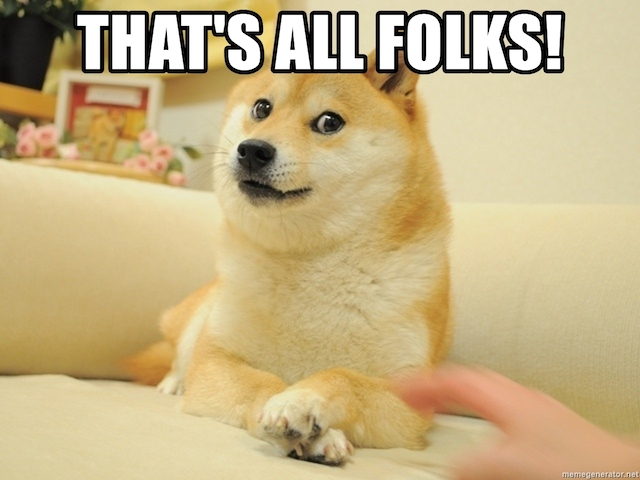

The good news is you basically know the score you already got because of the autograder. In fact, since for the first time the autograder is integrated into Gradescope, you should be able to see your autograder score automatically! There is one question we're manually grading (and we'll check for plagiarism), but for the most part things are relatively certain.

Before you submit on Gradescope (you must submit your notebook to receive credit):


1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**. 
3. Make sure you've run all the PennGrader cells
4. Go to the "File" tab at the top left, and download both the .ipynb and .py files, renaming them as "homework1.ipynb" and "homework1.py" respectively. Upload both files to Gradescope directly!

**Let the course staff know ASAP if you have any issues submitting, but otherwise best of luck! Congrats on finishing the first HW.**